## Is the brand recognition of different cars an important factor affecting the resale price?(Chao Wu)

### Hypothesis 1: Generally speaking, when purchasing used cars, some brands have relevent higher average resale price than other brands.

### Data cleaning for Q5: 
### 1. Drop NaN values for make, model, price and year
### 2. Check if there are unknown outliers for price and year, remove the price = 0 rows and year = 2025 rows

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.read_csv("carinfo_after_pre_clean.csv")
select_columns = ['make','model','price','year']
data = data.dropna(subset= select_columns) 
df_selected = data[select_columns]
df_selected.head()

,make,model,price,year
0,Subaru,Outback Limited,16998,2015
1,Subaru,Forester 2.5I,16998,2017
2,Subaru,Impreza,18998,2020
3,Subaru,Legacy 2.5I,14998,2016
4,Subaru,Crosstrek Premium,24998,2021


In [2]:
price_range = df_selected['price'].describe()
year_range = df_selected['year'].describe()
price_range, year_range 

(count    10346.000000
 mean     28088.966944
 std      10891.891304
 min          0.000000
 25%      19998.000000
 50%      25998.000000
 75%      32998.000000
 max      94998.000000
 Name: price, dtype: float64,
 count    10346.000000
 mean      2019.483375
 std          2.553509
 min       2012.000000
 25%       2018.000000
 50%       2020.000000
 75%       2021.000000
 max       2025.000000
 Name: year, dtype: float64)

In [3]:
df_q5 = df_selected[(df_selected['price'] != 0) & (df_selected['year'] != 2025)]
df_q5.head()
df_q5.describe()

,price,year
count,10331.000000,10331.000000
mean,28095.583583,2019.477398
std,10883.134071,2.548379
min,9599.000000,2012.000000
25%,19998.000000,2018.000000
50%,25998.000000,2020.000000
75%,32998.000000,2021.000000
max,94998.000000,2024.000000


## Hypothesis 1: Generally speaking, when purchasing used cars, some brands have relevent higher average resale price than other brands.

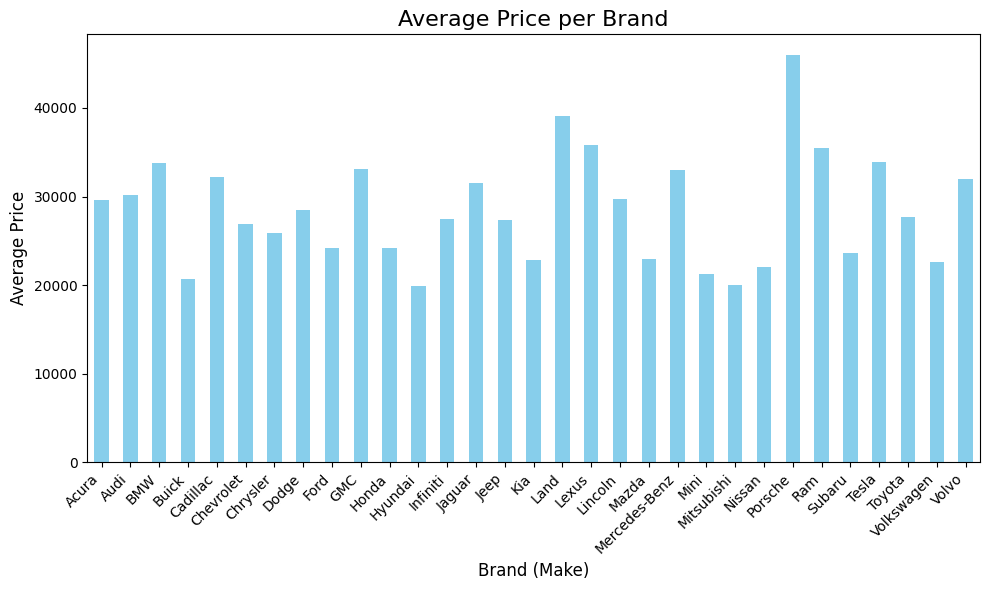

In [4]:
brand_avg_price = df_q5.groupby('make')['price'].mean()
plt.figure(figsize=(10,6))
brand_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price per Brand', fontsize=16)
plt.xlabel('Brand (Make)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
top_5_brands = brand_avg_price.sort_values(ascending=False).head(5)
low_5_brands = brand_avg_price.sort_values(ascending=True).head(5)
top_5_brands, low_5_brands

(make
 Porsche    45998.000000
 Land       39102.956268
 Lexus      35798.000000
 Ram        35472.193548
 Tesla      33868.689655
 Name: price, dtype: float64,
 make
 Hyundai       19954.468672
 Mitsubishi    20048.484252
 Buick         20720.965368
 Mini          21246.323276
 Nissan        22001.951100
 Name: price, dtype: float64)

### As shown in the bar chart of average price, the brand has certain impact to the reasale price. The Top 5 brand are Porsche, Land, Lexus, Ram, Tesla, which are common luxury or popular brands, with Hyundai, Mitsubishi, Buick, Minil,Nissan as the lowest 5 brands which are more affordable brands.

### Hypothesis 2: Though brands contribute to resale price, different brands have varying price variances, and the depreciation rate of cars varies across different are different over years.

In [6]:
brand_price_variance = df_q5.groupby('make')['price'].var()
pd.set_option('display.float_format', '{:.2f}'.format)
brand_price_variance.sort_values(ascending=False).head(10) 

make
Land            232462636.18
Chevrolet       187549853.09
GMC             155383789.20
BMW             145614411.35
Mercedes-Benz   139009542.46
Cadillac        137421356.55
Lincoln         121481604.06
Ford            118154131.27
Lexus           114885714.29
Porsche         113021459.23
Name: price, dtype: float64

### The top 10 brands with highest variance overall are mostly luxury brands but also include common brands such as Chevrolet, Ford. Luxury brands have large differences between entry-level and high-end models, while some mass-market brands have a wide range of models (such as sedans, SUVs, and trucks), resulting in significant price differences. There can also be some outliers in certain brands(tailored cars in mass-market brands). To illustrate the assumption, the box-plot is used to identify the outliers and distribution

In [7]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


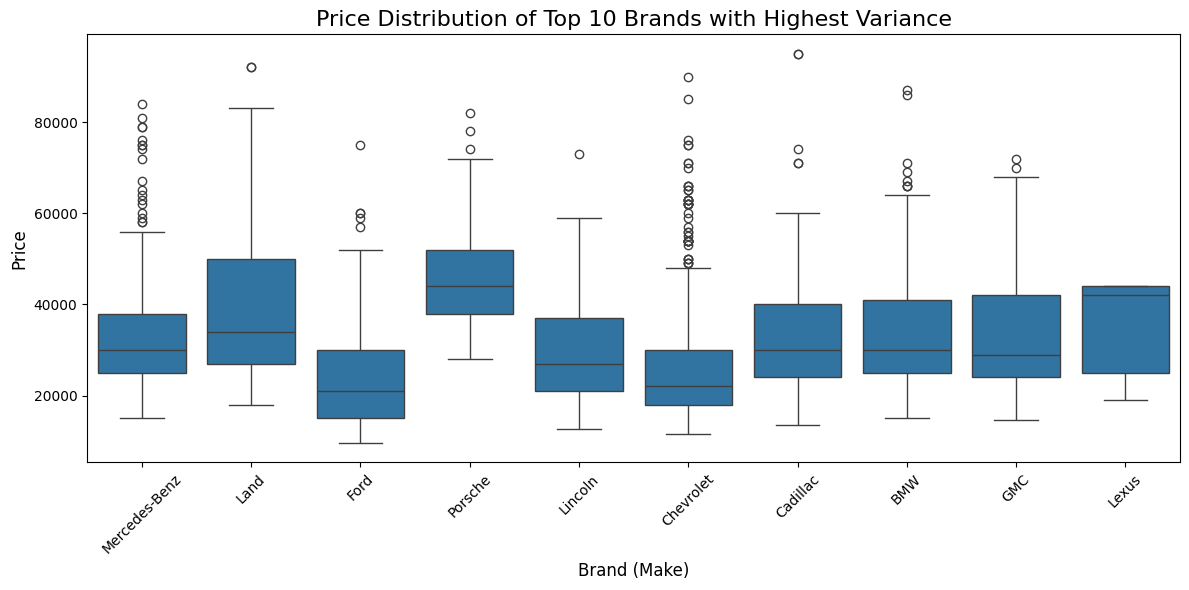

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

top_10_brands = brand_price_variance.sort_values(ascending=False).head(10).index
df_top_10_brands = df_q5[df_q5['make'].isin(top_10_brands)]
sns.boxplot(x='make', y='price', data=df_top_10_brands)

plt.title('Price Distribution of Top 10 Brands with Highest Variance', fontsize=16)
plt.xlabel('Brand (Make)', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


It is notable that Mercedes-Benz and Chevrolet are with the most outliers according to box-plot in the top 10 variance brands. This phenomenon can be analyzed below in two parts:

Luxury brands such as Land Rover, Mercedes-Benz, and Porsche have a wide price range, with prices from tens of thousands to over a million dollars. This large variation is due to these brands offering both entry-level luxury vehicles as well as high-end luxury or limited edition models. That's why Mercedes-Benz, Porsche, Cadillac and BMW have outliers above the upper bound.

For brands like Ford and Chevrolet, the price differences are also substantial, likely because these manufacturers produce a wide variety of vehicles, ranging from economy sedans to large trucks and SUVs. This diverse lineup leads to a broader price variance. That's why Ford, GMC, Chevrolet have outliers above the upper bound.

We cannot simply remove these outliers in the analysis because they still contribute part of the resale price. 

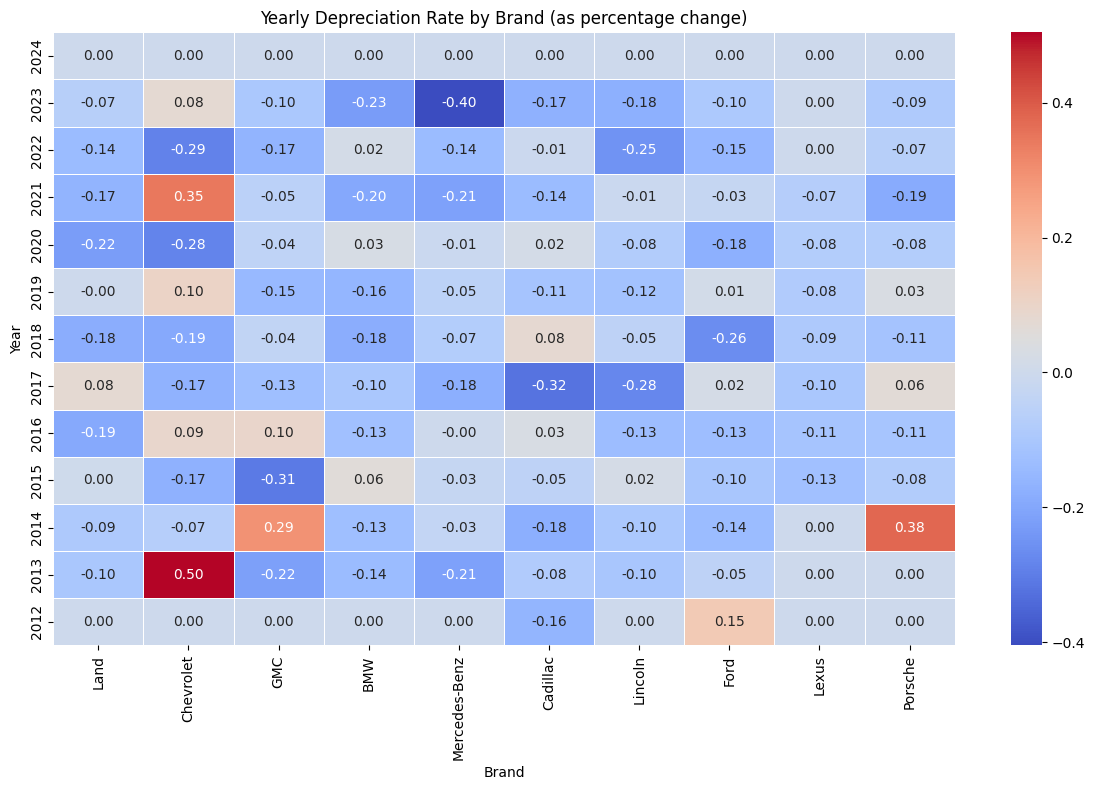

In [9]:
yearly_depreciation = df_q5.groupby(['year', 'make'])['price'].mean().unstack()
yearly_depreciation_top10 = yearly_depreciation[top_10_brands]

yearly_depreciation_top10 = yearly_depreciation_top10.sort_index(ascending=False)
yearly_depreciation_top10.interpolate(method='linear', inplace=True)
depreciation_rate = yearly_depreciation_top10.pct_change().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(depreciation_rate, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Yearly Depreciation Rate by Brand (as percentage change)')
plt.xlabel('Brand')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

### As shown in the heatmap, we calculate the deprecation rate for the top 10 brands from 2012 to 2014, most brands have shown varying degrees of reduction in depreciation rates (price increases) after 2020, especially after 2021, brands such as Land Rover and GMC have very small depreciation rates after 2021, and even tend to recover in price, indicating that these brands may have been driven by market demand during this period. The are unusual cases for Chevrolet, Ford and Porsche, when in 2013, 2014, and 2021, their prices increased significantly(50% for Chevrolet in the 2013 to 2014 period) instead of depreciating. This could be due to the severe variation of the supply and demand relationship in the auto market due to manufacture's marketing strategy. 

## Q6: Does the number of owners of used cars affect the resale price?(Chao Wu)

### Data cleaning for Q6: 
### 1. Drop NaN values for 'price','year','owner','mileage'
### 2. Use Z-score to normalize 'price','owner','mileage' to contribute equally to the distance computation and avoid screwing the data.
### 3. Check if there are unknown outliers for price and year, remove the price = 0 rows and year = 2025 rows

In [11]:
from sklearn.preprocessing import StandardScaler

select = ['make','model','price', 'year', 'owner', 'mileage','Open Recall Check','Accident / Damage']
data_q6 = data[select]
data_q6 = data_q6[(data_q6['price'] != 0) & (data_q6['year'] != 2025)& (data_q6['Open Recall Check'] != "Not Available")]
data_q6 = pd.DataFrame(data_q6)
numeric_columns = ['price', 'mileage']
data_q6 = data_q6.dropna(subset=numeric_columns)
scaler = StandardScaler()
data_q6[numeric_columns] = scaler.fit_transform(data_q6[numeric_columns])
data_q6 = data_q6.dropna(subset= select) 
print(data_q6)

         make              model  price  year  owner  mileage  \
0      Subaru    Outback Limited  -1.00  2015   2.00     1.70   
1      Subaru      Forester 2.5I  -1.00  2017   1.00     1.22   
2      Subaru           Impreza   -0.82  2020   1.00    -0.10   
3      Subaru        Legacy 2.5I  -1.19  2016   3.00     1.66   
4      Subaru  Crosstrek Premium  -0.27  2021   1.00     0.26   
...       ...                ...    ...   ...    ...      ...   
10341   Acura     MDX Technology  -0.45  2020   1.00     2.62   
10342   Acura               RDX   -0.64  2016   2.00     0.74   
10343   Acura  MDX SH-AWD A-Spec   0.46  2020   1.00    -0.44   
10344   Acura     TLX Technology   0.09  2021   1.00    -0.25   
10345   Acura  RDX SH-AWD A-Spec   0.64  2022   1.00     0.08   

      Open Recall Check Accident / Damage  
0       No Open Recalls          No Issue  
1      1 Open Recall(s)          Moderate  
2       No Open Recalls          No Issue  
3       No Open Recalls          No Issue  

## Hypothesis 1: Number of owners is a negative impactor to resale price. 

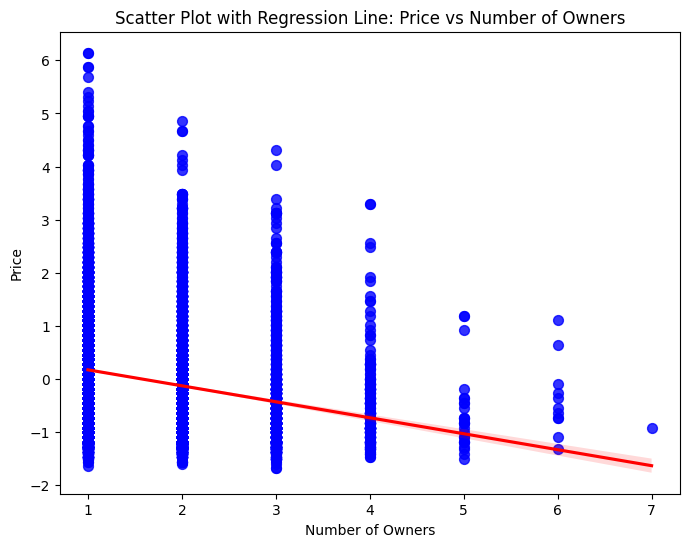

/var/folders/q4/rhr0y6xs6d56bfz17shcbxsw0000gn/T/ipykernel_32747/1936849032.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='owner', y='price', data=data_q6, cmap='Reds', shade=True, bw_adjust=0.5)


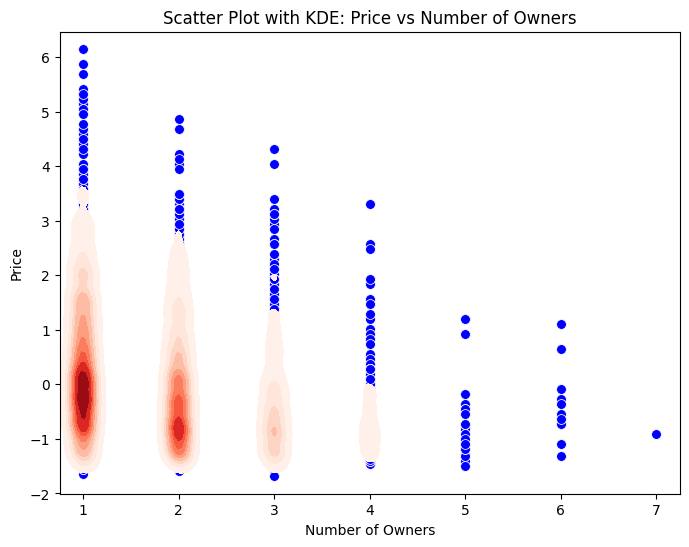

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(x='owner', y='price', data=data_q6, scatter_kws={'s':50, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line: Price vs Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='owner', y='price', data=data_q6, color='blue', s=50)
sns.kdeplot(x='owner', y='price', data=data_q6, cmap='Reds', shade=True, bw_adjust=0.5)
plt.title('Scatter Plot with KDE: Price vs Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Price')
plt.show()


### There is a significant negative correlation between the number of owners and the price. However, vehicles with more owners show more dispersed and lower price distributions, and vehicles with fewer owners (such as 1 or 2) tend to have higher prices concentrated in a higher range.We can see that this trend is not absolute, especially for vehicles with fewer owners, where price variance is greater.

## Hypothesis 2: Different brands have different price sensitivity to number of owners

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

owner_importance = []

grouped_brands = data_q6.groupby('make')

for name, group in grouped_brands:
    if len(group) < 100:  
        print(f"Brand: {name} has too few samples, skipping.")
        continue
    X = group[['owner', 'mileage', 'year']]  
    y = group['price']  
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    feature_importances = rf_model.feature_importances_
    owner_importance_value = feature_importances[list(X.columns).index('owner')]
    owner_importance.append({'Brand': name, 'Owner Importance': owner_importance_value})
importance_df = pd.DataFrame(owner_importance)
importance_df = importance_df.sort_values(by='Owner Importance', ascending=False)


Brand: Lexus has too few samples, skipping.


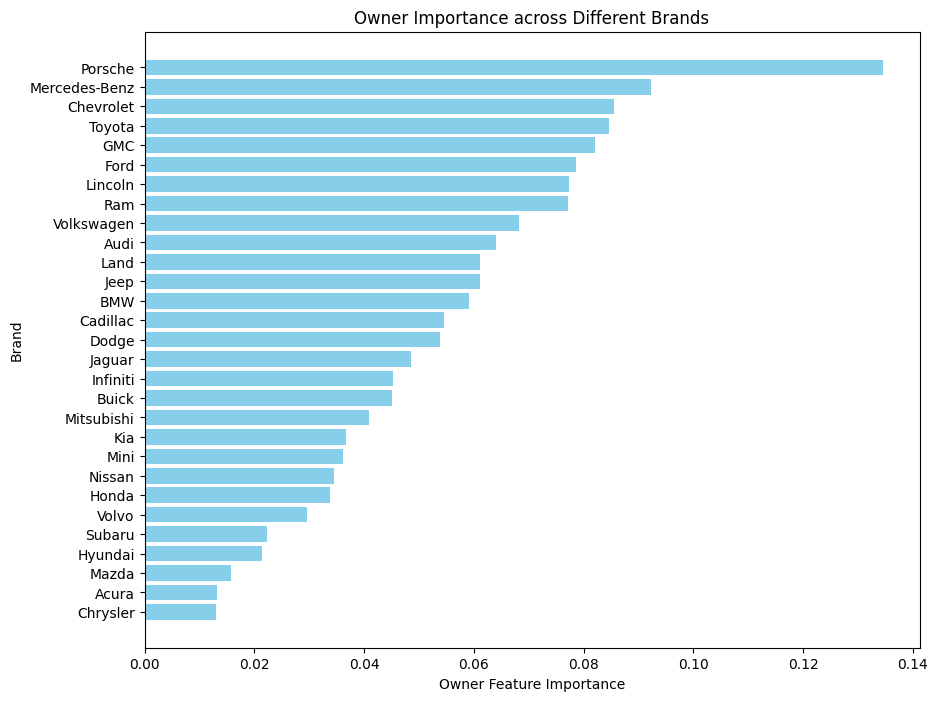

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Brand'], importance_df['Owner Importance'], color='skyblue')
plt.xlabel('Owner Feature Importance')
plt.ylabel('Brand')
plt.title('Owner Importance across Different Brands')
plt.gca().invert_yaxis()  
plt.show()

### Luxury brands, such as Porsche and Mercedes-Benz, show significantly higher sensitivity to the number of owners compared to other brands.This is because buyers of luxury cars place more importance on the vehicle's ownership history. In contrast, non-luxury brands like Chrysler, Mazda,buyers of non-luxury vehicles may be less concerned with the number of previous owners and more focused on other factors like mileage or overall condition. For middle class brands such as Toyota and Chevrolet, they have moderate sensitivity. These brands often maintain good resale value, indicating that they are moderate in value retention.
###  However, we can see from the training loop that brands smaller than 100 samples will be excluded from training, this could result in bias. For example, Lexus, one of the luxury brands, is excluded from training. If Lexus is added, we can see it generates the highest feature importance of number of owners, this is the result of bias. We may need more balanced  samples for calculating feature importance for different brands.a



